In [13]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict,Annotated, Literal
import operator
from dotenv import load_dotenv
from pydantic import BaseModel,Field
load_dotenv()

True

In [14]:
class values(TypedDict):
    a: int
    b: int
    choice : int
    result : int 
    equation : str

In [19]:
def show_values(state: values):
    return {"equation" : f"a={state["a"]}, b={state["b"]}"}


def sub(state: values):
    result=state["a"]-state["b"]
    return {"result":result}

def add(state: values):
    result=state["a"]+state["b"]
    return {"result":result}


def show_result(state: values):
    print(state["result"])
    return


def choose_function(state :values):
    if state["choice"]==1:
        return "add"
    else: return "sub"

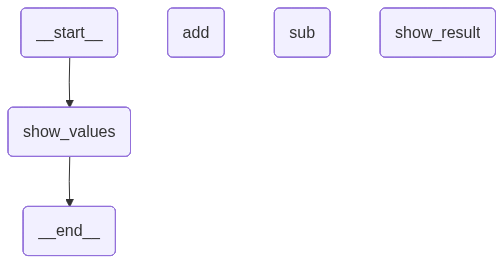

In [20]:
graph=StateGraph(values)

graph.add_node("show_values",show_values)
graph.add_node("add",add)
graph.add_node("sub",sub)
graph.add_node("show_result",show_result)

graph.add_edge(START,"show_values")
graph.add_conditional_edges("show_values",choose_function)
graph.add_edge("add","show_result")
graph.add_edge("sub","show_result")
graph.add_edge("show_result",END)

graph.compile()

In [21]:
workflow=graph.compile()
ini_state={"a":1,"b":2,"choice":2}
final_state=workflow.invoke(ini_state)
print(final_state)

-1
{'a': 1, 'b': 2, 'choice': 2, 'result': -1, 'equation': 'a=1, b=2'}
